# Feature Engineering - Handling Outliers

**Outliers** are data points that significantly deviate from the other observations in a dataset. These values lie outside the typical range of the data and can result from variability in the data, measurement errors, or data entry mistakes.

## Why Do Outliers Exist in a Dataset?
1.	Measurement Errors: Incorrect readings or data entry issues.
2.	Natural Variation: Rare occurrences in real-world data (e.g., extreme weather events).
3.	Data Merging Issues: Combining datasets with different scales or standards.
4.	Anomalies: Genuine rare events that should be investigated further.

## How to Detect Outliers?

**1.	Statistical Methods:**            
**o	Z-Score:** Values with z-scores greater than 3 (or less than -3) are considered outliers.              
**o	IQR (Interquartile Range):** Values below Q1 - 1.5IQR or above Q3 + 1.5IQR.      
**o	Percentile-Based Approach:** Values beyond a specific percentile range, such as the 1st and 99th percentiles. 

**2.	Visualization Methods:**            
**o	Boxplot:** Highlights points outside the whiskers.             
**o	Scatter Plot:** Reveals isolated data points.            
**o	Histogram:** Shows unusual peaks or gaps.                

**3.	Domain Knowledge:** Leverage industry-specific thresholds to identify unexpected values.             
 
## Effects of Outliers on Analysis and Machine Learning Models                          
1.	Inaccurate Results: Skews mean, standard deviation, and other statistics.                   
2.	Poor Model Performance:                                                        
o	Can lead to overfitting in sensitive algorithms like linear regression and KNN.                     
o	Distorts relationships between variables.                               
3.	Bias in Decision-Making: Outliers may lead to misleading conclusions.                         
4.	Inefficient Resource Use: May result in increased computation time and complexity.              

## 1. Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 2. Load the Dataset

In [5]:
Path= "C:\\Users\\BINPAT\\Documents\\Python Self\\Feature Engineering\\Datasets\\placement.csv"
# Load dataset
df = pd.read_csv(Path)

# Display the first few rows of the dataset
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
# Necessary Informations
print(df.shape,'\n')
print("*********************************\n")
print(df.info())

(1000, 3) 

*********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


In [7]:
# Summary statistics for understanding the data
print(df.describe())

              cgpa  placement_exam_marks       placed
count  1000.000000           1000.000000  1000.000000
mean      6.961240             32.225000     0.489000
std       0.615898             19.130822     0.500129
min       4.890000              0.000000     0.000000
25%       6.550000             17.000000     0.000000
50%       6.960000             28.000000     0.000000
75%       7.370000             44.000000     1.000000
max       9.120000            100.000000     1.000000


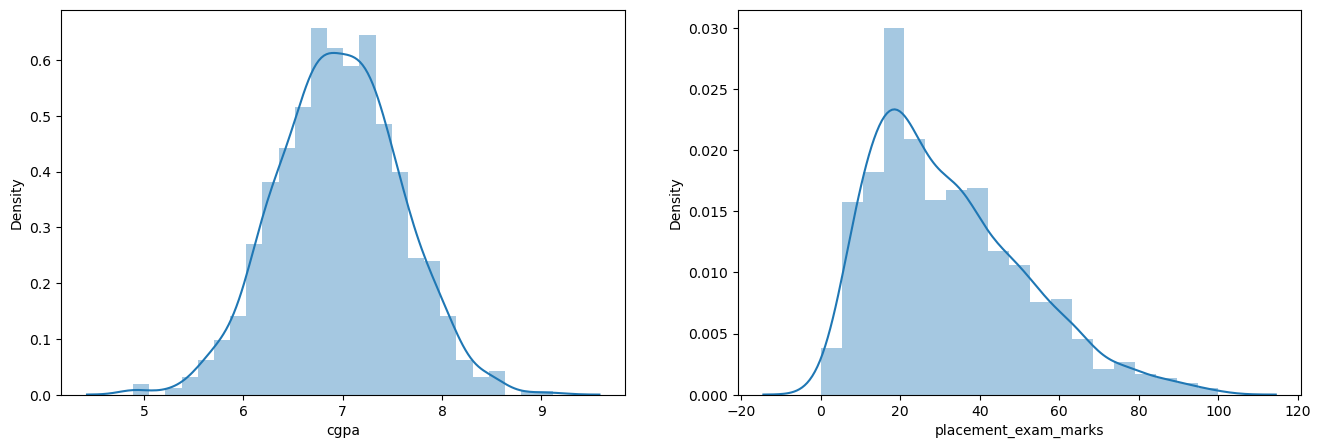

In [8]:
# Cheking Distribution 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
#sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

### Conclussion: 
1. CGPA follows Normal Distribution or similar to ND.                  
2. Placement Exam Marks follows Skewed Distribution.

## 3. Detect Outliers

### 3.1. Z-Score Method

### Z-Score Method
* The Z-Score method identifies outliers by calculating how far a data point is from the mean, in terms of standard deviations.
* A Z-score greater than 3 or less than -3 indicates that the data point is more than 3 standard deviations away from the mean, which is generally considered an outlier in a normally distributed dataset.

### Z-score formula: Z = (X - μ) / σ
Where: X is the data point, μ is the mean of the data, σ is the standard deviation of the data

### Use case: 
This method works well when the data follows a normal distribution, as extreme values in a normal distribution are generally those that fall far away from the mean.

In [13]:
from scipy import stats

# Calculating Z Score
z_scores = np.abs(stats.zscore(df[['cgpa', 'placement_exam_marks']]))
outliers_z_score = (z_scores > 3).any(axis=1)  # Identifying outliers with z-score > 3

# Get the rows with outliers
outliers_z_score_rows = df[outliers_z_score]
print("Outliers detected by Z-Score method:")
print(outliers_z_score_rows)

Outliers detected by Z-Score method:
     cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
134  6.33                  93.0       0
162  7.80                  90.0       0
324  6.64                  90.0       0
485  4.92                  44.0       1
630  6.56                  96.0       1
730  6.14                  90.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1


### 3.2. IQR (Interquartile Range) Method

### IQR (Interquartile Range) Method
* The IQR method identifies outliers by examining the spread of the central 50% of the data.
* It calculates the first quartile (Q1) and third quartile (Q3), then defines the outlier boundaries as 1.5 times the IQR below Q1 and above Q3.

### Outlier bounds formula: Outlier bounds = [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
Where: IQR = Q3 - Q1
* Any data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

### Use case: 
The IQR method is more robust to skewed distributions and is especially effective for data that is non-normal or skewed, as it doesn't assume any particular distribution of the data.

In [16]:
# Calculate IQR for 'cgpa' and 'placement_exam_marks'
Q1_cgpa = df['cgpa'].quantile(0.25)
Q3_cgpa = df['cgpa'].quantile(0.75)
IQR_cgpa = Q3_cgpa - Q1_cgpa

Q1_marks = df['placement_exam_marks'].quantile(0.25)
Q3_marks = df['placement_exam_marks'].quantile(0.75)
IQR_marks = Q3_marks - Q1_marks

# Define outlier range based on IQR
lower_bound_cgpa = Q1_cgpa - 1.5 * IQR_cgpa
upper_bound_cgpa = Q3_cgpa + 1.5 * IQR_cgpa

lower_bound_marks = Q1_marks - 1.5 * IQR_marks
upper_bound_marks = Q3_marks + 1.5 * IQR_marks

# Detect outliers
outliers_iqr_cgpa = df[(df['cgpa'] < lower_bound_cgpa) | (df['cgpa'] > upper_bound_cgpa)]
outliers_iqr_marks = df[(df['placement_exam_marks'] < lower_bound_marks) | (df['placement_exam_marks'] > upper_bound_marks)]

print("Outliers detected by IQR method (CGPA):")
print(outliers_iqr_cgpa)
print("Outliers detected by IQR method (Placement Exam Marks):")
print(outliers_iqr_marks)

Outliers detected by IQR method (CGPA):
     cgpa  placement_exam_marks  placed
278  5.23                  17.0       1
485  4.92                  44.0       1
815  5.27                  43.0       0
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1
Outliers detected by IQR method (Placement Exam Marks):
     cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31               

### 3.3. Percentile-Based Approach

### Percentile-Based Approach
* The Percentile-Based Approach identifies outliers by looking at values that lie beyond a certain percentile range.
* For example, any data point below the 1st percentile or above the 99th percentile can be considered an outlier.
* The method works by setting thresholds based on the data's lower and upper percentiles, and flagging values outside of these thresholds.

### Outlier bounds formula: Outlier bounds = [1st percentile, 99th percentile]

### Use case: 
* This method is general and can be applied to any distribution of data. 
* It's useful when there are no strong assumptions about the distribution of data, and you simply want to flag values that lie far from the main body of the data.

In [19]:
# Calculate 1st and 99th percentiles for both columns
percentile_1_cgpa = df['cgpa'].quantile(0.01)
percentile_99_cgpa = df['cgpa'].quantile(0.99)

percentile_1_marks = df['placement_exam_marks'].quantile(0.01)
percentile_99_marks = df['placement_exam_marks'].quantile(0.99)

# Detect outliers beyond the 1st and 99th percentiles
outliers_percentile_cgpa = df[(df['cgpa'] < percentile_1_cgpa) | (df['cgpa'] > percentile_99_cgpa)]
outliers_percentile_marks = df[(df['placement_exam_marks'] < percentile_1_marks) | (df['placement_exam_marks'] > percentile_99_marks)]

print("Outliers detected by Percentile-Based Approach (CGPA):")
print(outliers_percentile_cgpa)
print("Outliers detected by Percentile-Based Approach (Placement Exam Marks):")
print(outliers_percentile_marks)

Outliers detected by Percentile-Based Approach (CGPA):
     cgpa  placement_exam_marks  placed
37   8.51                   9.0       1
150  8.53                  22.0       0
216  5.42                  36.0       1
219  5.48                   3.0       0
278  5.23                  17.0       1
279  8.49                  40.0       1
440  8.56                  22.0       0
471  5.48                  18.0       0
485  4.92                  44.0       1
492  8.50                  21.0       1
596  8.48                  25.0       1
815  5.27                  43.0       0
818  5.52                  62.0       0
869  5.51                  58.0       1
975  8.43                  25.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1
Outliers detected by Percentile-Based Approach (Placement Exam Marks):
     cgpa  placement_exam_marks  p

### 3.4. Box Plot

A **box plot** (also known as a box-and-whisker plot) is a great way to visualize the distribution of data and identify potential outliers. It displays the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values, helping us spot values that fall outside the expected range.

**How Box Plot Helps Detect Outliers:**
1. **Interquartile Range (IQR):** The box represents the IQR, which is the range between Q1 and Q3. This is the middle 50% of the data.
2. **Whiskers:** The lines extending from the box (whiskers) show the minimum and maximum values within a defined range (typically 1.5 times the IQR).
3. **Outliers:** Any data points outside the whiskers (i.e., beyond \( Q1 - 1.5 \times IQR \) or \( Q3 + 1.5 \times IQR \)) are considered outliers.

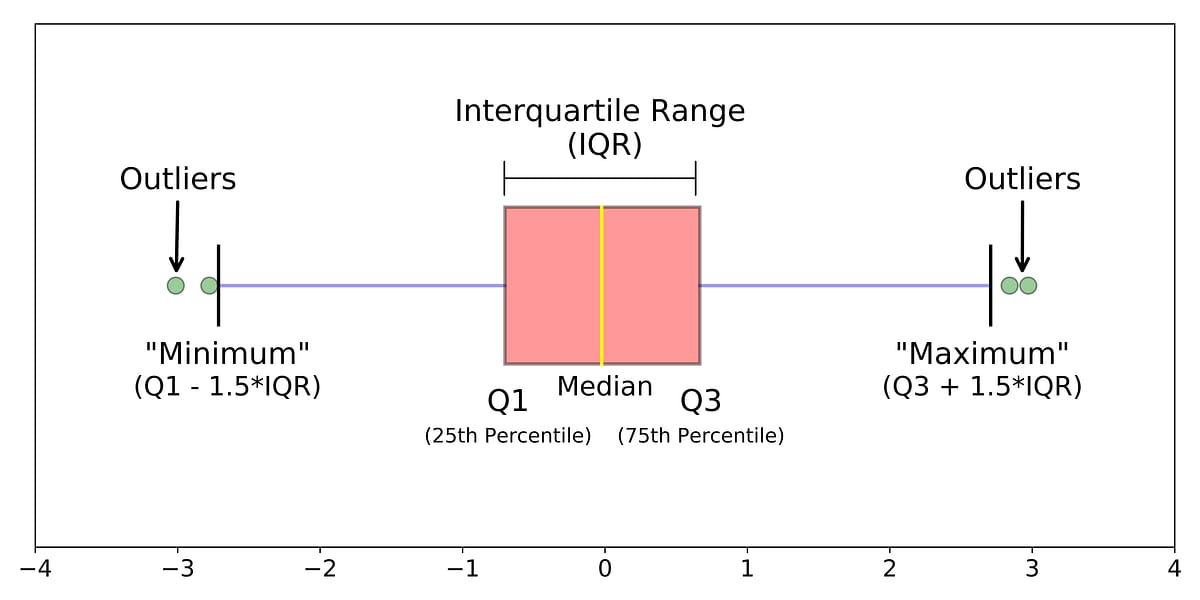

In [22]:
from IPython.display import Image
# Provide the file path correctly
Image(filename='C:/Users/BINPAT/Downloads/WhatsApp Image 2025-01-09 at 11.25.56 AM.jpeg')

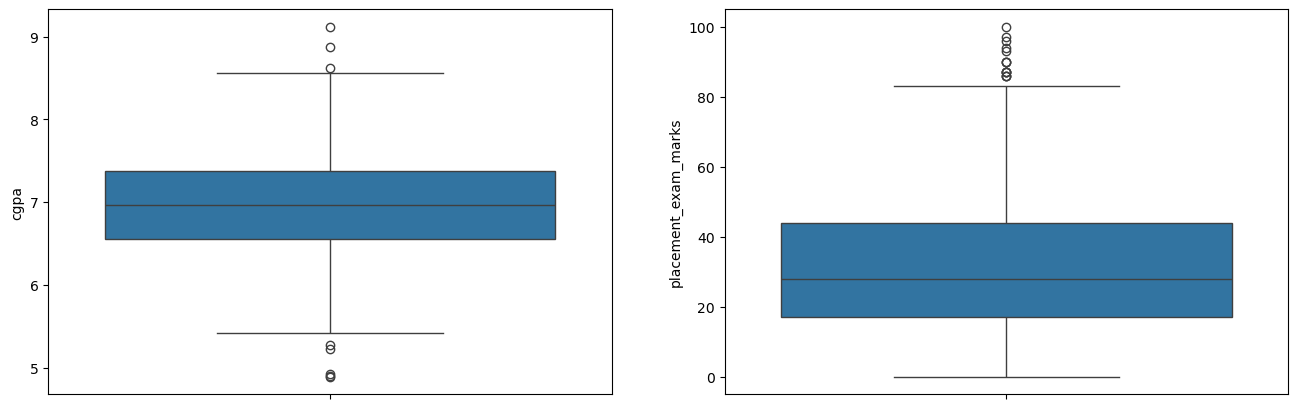

In [23]:
# Cheking by box plot 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
#sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.show()

### 3.5. Histogram

A **histogram** is a graphical representation of the distribution of numerical data, showing the frequency of data points within certain ranges (bins). Histograms are useful for understanding the shape of the data distribution and identifying potential outliers.

**How Histograms Help Detect Outliers:**
1. **Distribution Shape:** A histogram displays how data is spread across different ranges. Outliers appear as isolated bars or groups of bars at the extremes of the distribution, far from the majority of the data.
2. **Binning:** Data is divided into bins (intervals), and each bin represents the frequency of values within that range. Outliers may fall in bins that are far away from the main cluster of data.
3. **Visual Clusters:** When looking at a histogram, the main cluster of data should be concentrated around a particular range. If you see bars that are separate from the main cluster, they could represent outliers.

Histograms are great for quickly spotting the overall distribution of your data and identifying extreme values. You can also apply thresholds based on percentiles or Z-scores to pinpoint and address outliers.

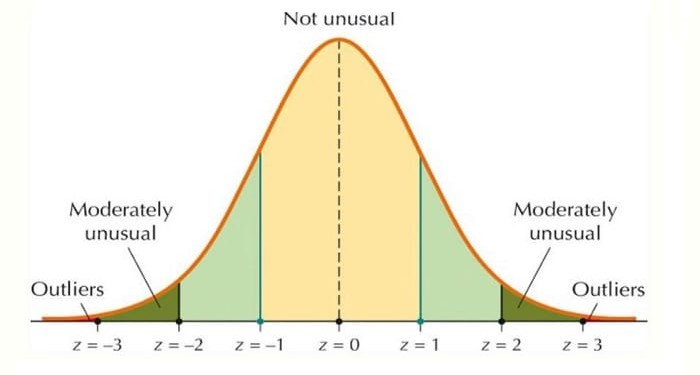

In [26]:
from IPython.display import Image
# Provide the file path correctly
Image(filename='C:/Users/BINPAT/Downloads/WhatsApp Image 2025-01-09 at 11.25.55 AM.jpeg')

Mean Value :  6.96124
Median Value :  6.96
1st Standard Deviation :  0.6158978751323894
Upper Limit :  8.808933625397168
Lower Limit :  5.113546374602832


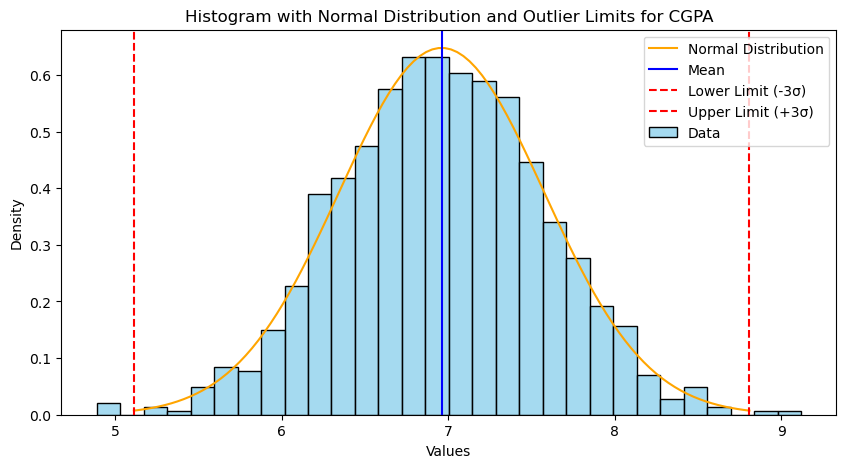

In [27]:
from scipy.stats import norm

# Replace this with your dataset column
data = df['cgpa']  # Replace 'cgpa' with the column you want to analyze

# Calculate key statistics
mean = data.mean()
std = data.std()
median = data.median()
upper_limit = mean + std * 3
lower_limit = mean - std * 3

print("Mean Value : ", mean)
print("Median Value : ", median)
print("1st Standard Deviation : ", std)
print("Upper Limit : ", upper_limit)
print("Lower Limit : ", lower_limit)

# Plot histogram with distribution line
plt.figure(figsize=(10, 5))

sns.histplot(data, kde=False, bins=30, color="skyblue", stat="density", label="Data")
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
plt.plot(x, norm.pdf(x, mean, std), color='orange', label='Normal Distribution')

# Add vertical lines for mean and 3-sigma limits
plt.axvline(mean, color='blue', linestyle='-', label='Mean')
plt.axvline(lower_limit, color='red', linestyle='--', label='Lower Limit (-3σ)')
plt.axvline(upper_limit, color='red', linestyle='--', label='Upper Limit (+3σ)')

# Legend and labels
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Normal Distribution and Outlier Limits for CGPA')

plt.show()

Mean Value :  32.225
Median Value :  28.0
1st Standard Deviation :  19.13082233892108
Upper Limit :  89.61746701676324
Lower Limit :  -25.167467016763247


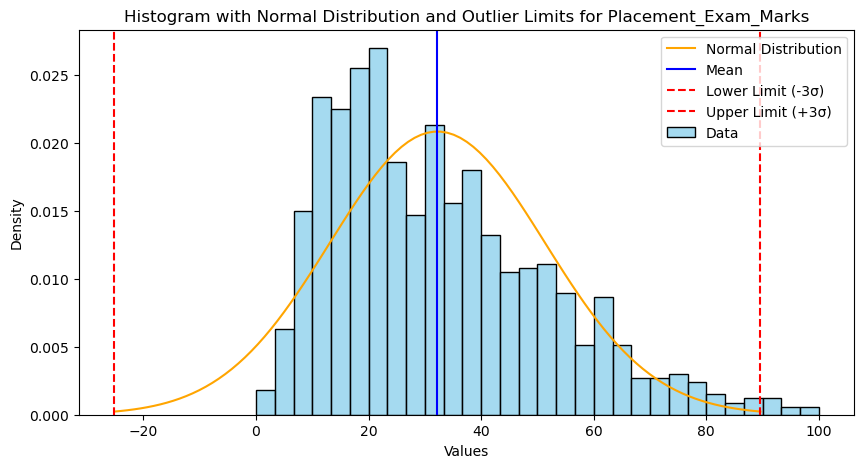

In [28]:
from scipy.stats import norm

# Replace this with your dataset column
data = df['placement_exam_marks']  # Replace 'cgpa' with the column you want to analyze

# Calculate key statistics
mean = data.mean()
std = data.std()
median = data.median()
upper_limit = mean + std * 3
lower_limit = mean - std * 3

print("Mean Value : ", mean)
print("Median Value : ", median)
print("1st Standard Deviation : ", std)
print("Upper Limit : ", upper_limit)
print("Lower Limit : ", lower_limit)

# Plot histogram with distribution line
plt.figure(figsize=(10, 5))

sns.histplot(data, kde=False, bins=30, color="skyblue", stat="density", label="Data")
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
plt.plot(x, norm.pdf(x, mean, std), color='orange', label='Normal Distribution')

# Add vertical lines for mean and 3-sigma limits
plt.axvline(mean, color='blue', linestyle='-', label='Mean')
plt.axvline(lower_limit, color='red', linestyle='--', label='Lower Limit (-3σ)')
plt.axvline(upper_limit, color='red', linestyle='--', label='Upper Limit (+3σ)')

# Legend and labels
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Normal Distribution and Outlier Limits for Placement_Exam_Marks')

plt.show()

## 4. Removing Outliers

### 4.1. Z-Score Method

* Remove data points with z-scores greater than a chosen threshold (e.g., ±3)
* Z Score = (X - μ) / σ                          
 Where: X is the data point, μ is the mean of the data, σ is the standard deviation of the data

In [31]:
from scipy import stats

# Z-Score method (threshold = 3)
df_zscore = df[(np.abs(stats.zscore(df[['cgpa', 'placement_exam_marks']])) < 3).all(axis=1)]

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Z-Score: ", df_zscore.shape)

Original Shape:  (1000, 3)
After Applying Z-Score:  (987, 3)


### 4.2. IQR Method

* Remove points outside the range [Q1 - 1.5* IQR, Q3 + 1.5* IQR]

In [33]:
# IQR method for both columns
Q1_cgpa = df['cgpa'].quantile(0.25)
Q3_cgpa = df['cgpa'].quantile(0.75)
IQR_cgpa = Q3_cgpa - Q1_cgpa

Q1_placement = df['placement_exam_marks'].quantile(0.25)
Q3_placement = df['placement_exam_marks'].quantile(0.75)
IQR_placement = Q3_placement - Q1_placement

# Apply IQR rule
df_iqr = df[(df['cgpa'] >= (Q1_cgpa - 1.5 * IQR_cgpa)) & (df['cgpa'] <= (Q3_cgpa + 1.5 * IQR_cgpa))]
df_iqr = df_iqr[(df_iqr['placement_exam_marks'] >= (Q1_placement - 1.5 * IQR_placement)) & 
                 (df_iqr['placement_exam_marks'] <= (Q3_placement + 1.5 * IQR_placement))]

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying IQR Methods: ", df_iqr.shape)

Original Shape:  (1000, 3)
After Applying IQR Methods:  (977, 3)


### 4.3. Capping and Flooring

* We are not remoing any data points here.
* Replace outliers with the maximum and minimum threshold values
* Capping means replacing values greater than the upper threshold with the threshold value (in your case, Q3 + 1.5 * IQR).
* Flooring means replacing values less than the lower threshold with the threshold value (in your case, Q1 - 1.5 * IQR).

In [35]:
# Capping and Flooring for both columns (based on IQR)
df_cap_floor = df.copy()
df_cap_floor['cgpa'] = np.where(df_cap_floor['cgpa'] > (Q3_cgpa + 1.5 * IQR_cgpa), 
                                 Q3_cgpa + 1.5 * IQR_cgpa, 
                                 np.where(df_cap_floor['cgpa'] < (Q1_cgpa - 1.5 * IQR_cgpa), 
                                          Q1_cgpa - 1.5 * IQR_cgpa, df_cap_floor['cgpa']))

df_cap_floor['placement_exam_marks'] = np.where(df_cap_floor['placement_exam_marks'] > (Q3_placement + 1.5 * IQR_placement), 
                                                Q3_placement + 1.5 * IQR_placement, 
                                                np.where(df_cap_floor['placement_exam_marks'] < (Q1_placement - 1.5 * IQR_placement), 
                                                         Q1_placement - 1.5 * IQR_placement, df_cap_floor['placement_exam_marks']))

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Capping and Flooring Methods: ", df_cap_floor.shape)

Original Shape:  (1000, 3)
After Applying Capping and Flooring Methods:  (1000, 3)


### 4.4. Winsorization

* Limit extreme values to a defined range without removing them.                 
* New Value=min(max(Value,lower bound),upper bound)                                 
 Where:                                                                
* Lower bound = 1st percentile (or a specified lower percentile)                
* Upper bound = 99th percentile (or a specified higher percentile)

In [37]:
from scipy.stats import mstats

# Winsorization for both columns (capping at 1st and 99th percentiles)
df_winsor = df.copy()
df_winsor['cgpa'] = mstats.winsorize(df_winsor['cgpa'], limits=[0.01, 0.01])
df_winsor['placement_exam_marks'] = mstats.winsorize(df_winsor['placement_exam_marks'], limits=[0.01, 0.01])

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Winsorization Methods: ", df_winsor.shape)

Original Shape:  (1000, 3)
After Applying Winsorization Methods:  (1000, 3)


### 4.5. Transformations

### 4.5.1. Log Transformation (For Right-Skewed Data)

* Log transformation for cgpa (ensure no zero or negative values).                     
* Y=log(X+1)                                      
Where:            
* X is the original value             
* Y is the transformed value                                  
* The "+1" is added to avoid taking the log of zero or negative values.             

In [40]:
df_log = df.copy()
df_log['cgpa'] = np.log1p(df_log['cgpa'])

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Log Transformation Methods: ", df_log.shape)

Original Shape:  (1000, 3)
After Applying Log Transformation Methods:  (1000, 3)


### 4.5.2. Square Root Transformation (For Mildly Skewed Data)

* Square root transformation for placement_exam_marks.                                 
* Y= Square root of X                                   
Where:                                 
* X is the original value                                 
* Y is the transformed value

In [42]:
df_sqrt = df.copy()
df_sqrt['placement_exam_marks'] = np.sqrt(df_sqrt['placement_exam_marks'])


# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Square Root Transformation Methods: ", df_sqrt.shape)

Original Shape:  (1000, 3)
After Applying Square Root Transformation Methods:  (1000, 3)


### 4.5.3. Box-Cox Transformation
Box-Cox transformation for cgpa (only for positive values)

In [44]:
from scipy import stats

df_boxcox = df.copy()
df_boxcox['cgpa'], _ = stats.boxcox(df_boxcox['cgpa'] + 1)  # Adding 1 to avoid zero values

# Check the new shape of dataframe
print("Original Shape: ", df.shape)
print("After Applying Box-Cox Transformation Methods: ", df_boxcox.shape)

Original Shape:  (1000, 3)
After Applying Box-Cox Transformation Methods:  (1000, 3)
